# Perceptron


For each training $x^{(i)}$ example,

$$
\hat{y}^{(i)}=\sigma (w^Tx^{(i)}+b),
$$

where $\sigma (z^{(i)}) = \frac{1}{1+e^{-z^{(i)}}}$.


Given ${(x^{(1)}, y^{(1)}),...,(x^{(m)}, y^{(m)})}$, we want $\hat{y}^{(i)}\approx y^{(i)}$.


In order for the error function to be convex, instead of using a function such as

$$
L(\hat{y},y)=\frac{1}{2}(\hat{y}-y)^2,
$$

we use

$$
L(\hat{y},y)=-(y\mathrm{log}(\hat{y})+(1-y)\mathrm{log}(1-\hat{y}))
$$

to make the loss function convex.


Cost function for binary classification is defined as

$$
\begin{align}
J(w,b)&=\frac{1}{m}\sum_{i=1}^{m}L(\hat{y}^{(i)},y^{(i)}) \\
&=-\frac{1}{m}[y^{(i)}\mathrm{log}(\hat{y}^{(i)})+(1-y^{(i)})\mathrm{log}(1-\hat{y}^{(i)})].
\end{align}
$$


For training, one needs to compute

$$
\begin{align}
w&:=w-\alpha \frac{\partial{J}}{\partial w}\\
b&:=b-\alpha \frac{\partial{J}}{\partial b}.
\end{align}
$$


Suppose we have two inputs $x_1,x_2$, then

$$
\begin{align}
z&=w_1x_1+w_2x_2+b\\
\hat{y}&=a=\sigma(z)\\
\end{align}
$$

and finally we can compute $L(a,y)$.


$$
\begin{align}
\mathrm{d}a&=\frac{\mathrm{d}L}{\mathrm{d}a}=-\frac{y}{a}+\frac{1-y}{1-a}\\
\mathrm{d}z&=\frac{\mathrm{d}L}{\mathrm{d}a}\frac{\mathrm{d}a}{\mathrm{d}z}=(-\frac{y}{a}+\frac{1-y}{1-a})(a(1-a))=a-y\\
\mathrm{d}w_1&=\frac{\mathrm{d}L}{\mathrm{d}a}\frac{\mathrm{d}a}{\mathrm{d}z}\frac{\mathrm{d}z}{\mathrm{d}w_1}=x_1\mathrm{d}z\\
\mathrm{d}w_2&=\frac{\mathrm{d}L}{\mathrm{d}a}\frac{\mathrm{d}a}{\mathrm{d}z}\frac{\mathrm{d}z}{\mathrm{d}w_1}=x_2\mathrm{d}z\\
\mathrm{d}b&=\frac{\mathrm{d}L}{\mathrm{d}a}\frac{\mathrm{d}a}{\mathrm{d}z}\frac{\mathrm{d}z}{\mathrm{d}w_1}=\mathrm{d}z
\end{align}
$$


Compute the derivatives on $m$ examples.


$$
\begin{align}
\frac{\partial J}{\partial w_1}&=\frac{1}{m}\sum_{i=1}^{m}x^{(i)}_1(a^{(i)}-y^{(i)})\\
\frac{\partial J}{\partial w_2}&=\frac{1}{m}\sum_{i=1}^{m}x^{(i)}_2(a^{(i)}-y^{(i)})\\
\frac{\partial J}{\partial b}&=\frac{1}{m}\sum_{i=1}^{m}(a^{(i)}-y^{(i)})
\end{align}
$$


In [152]:

# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
np.random.seed(42)

m = 1000  # number of examples
n = 2  # number of features

x = np.random.random((n, m))
y = np.random.random((1, m)).round()

# Parameters to be optimized
w = np.random.random((n, 1))
b = 0.0
lr = 0.001
n_iteration = 1000


def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

0 [0.76486131]
200 [0.75592202]
400 [0.74807381]
600 [0.74119921]
800 [0.73518973]


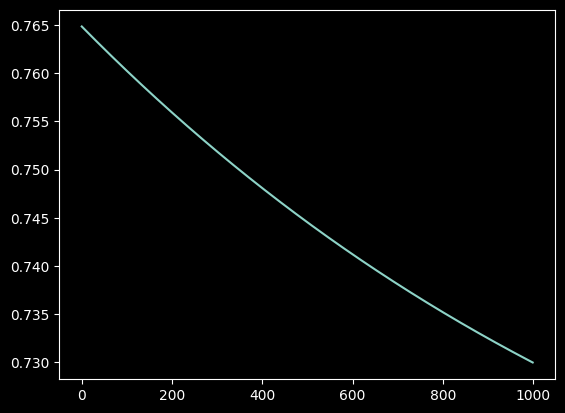

In [153]:
# Parameters to be optimized
w1 = w.copy()
b1 = 0.0

def train1(w, b):
    J = 0
    dw1 = 0.0
    dw2 = 0.0
    db = 0.0

    for i in range(m):
        # Forward
        z = w.T @ x[:, i] + b
        a = sigmoid(z)
        J += -(y[0, i] * np.log(a) + (1 - y[0, i]) * np.log(1 - a))

        # Backward
        dz = a - y[0, i]
        dw1 += x[0, i] * dz
        dw2 += x[1, i] * dz
        db += dz

    J /= m
    dw1 /= m
    dw2 /= m
    db /= m

    # Update
    w[0] -= lr * dw1
    w[1] -= lr * dw2
    b -= lr * db

    return J, w, b


costs1 = []
for i in range(n_iteration):
    J, w1, b1 = train1(w1, b1)
    if i % 200 == 0:
        print(i, J)
    costs1.append(J)

plt.plot(costs1)


0.7648613122812681
0.7559220229474659
0.7480738072187982
0.741199210504429
0.7351897321957497


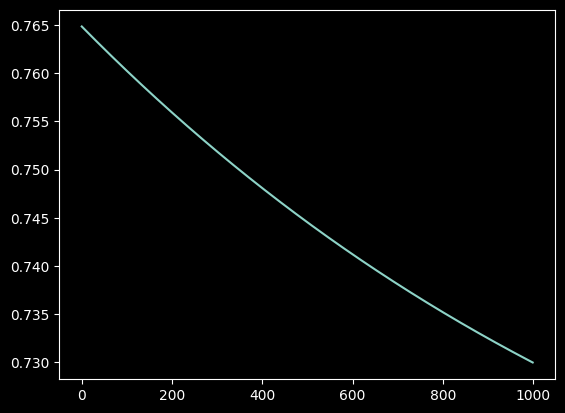

In [154]:
# Parameters to be optimized
w2 = w.copy()
b2 = 0.0

def train2(w, b):
    # Forward
    # w: 2x1, x: 2xm, b: 1x1
    Z = w.T @ x + b
    # z: 1xm
    A = sigmoid(Z)
    # a: 1xm, y: 1xm
    J = (-(y * np.log(A) + (1 - y) * np.log(1 - A))).mean()

    # Backward
    dz = A - y
    # dz: 1xm
    dW = x @ dz.T / m
    db = dz.mean()

    # Update
    w -= lr * dW
    b -= lr * db

    return J, w, b


costs2 = []
for i in range(n_iteration):
    J, w2, b2 = train2(w2, b2)
    if i % 200 == 0:
        print(J)
    costs2.append(J)

plt.plot(costs2)


AssertionError: 0.06978162445438119

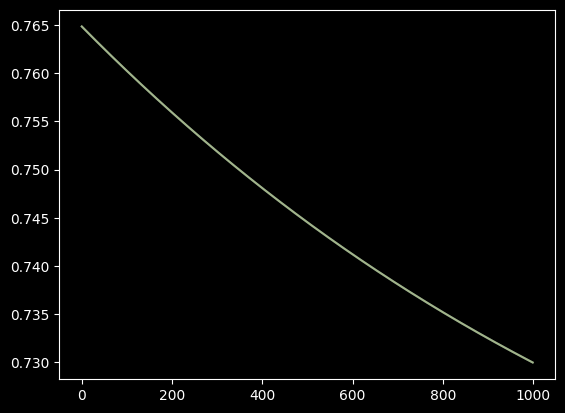

In [155]:
plt.plot(costs1, alpha=0.5)
plt.plot(costs2, alpha=0.5)
assert np.allclose(costs1, costs2), (np.asarray(costs1) - costs2).ptp()